# FIRE DETECTION BY USING IMAGE PAROCESSING

#DATASETS DESCRIPTION
#Here. the datas are taken the Fire and Non-Fire Image Datas 
#Fire Present Image are taken 755 Image
#Non-Fire Image are taken 98 Image
#Total we are taken the Image are 853 Image. 


# PACKAGES AND LIBRARIES

In [37]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob

In [39]:
#IMAGE PROCESS
import tensorflow
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2


In [40]:
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

In [41]:
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [42]:
#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop

In [43]:
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications.inception_v3 import InceptionV3
from keras import backend as K
from tensorflow.keras.utils import plot_model

In [44]:
#SKLEARN CLASSIFIER
from sklearn.linear_model import LogisticRegression

In [45]:
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [46]:
#!pip install lightgbm

# PATH & LABEL PROCESS

#### MAIN PATH

In [47]:
Fire_Dataset_Path = Path(r"D:\Python Project\Fire Detection using Image Processing\Source code\Dataset\fire_dataset")

#### PATH PROCESS

In [48]:
PNG_Path = list(Fire_Dataset_Path.glob(r"*/*.png"))

#### LABEL PROCESS

In [49]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [50]:
print("FIRE: ", PNG_Labels.count("fire_images"))
print("NO_FIRE: ", PNG_Labels.count("non_fire_images"))

FIRE:  755
NO_FIRE:  98


# TRANSFORMATION TO SERIES STRUCTURE

In [51]:
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [52]:
print(PNG_Path_Series)

0      D:\Python Project\Fire Detection using Image P...
1      D:\Python Project\Fire Detection using Image P...
2      D:\Python Project\Fire Detection using Image P...
3      D:\Python Project\Fire Detection using Image P...
4      D:\Python Project\Fire Detection using Image P...
                             ...                        
848    D:\Python Project\Fire Detection using Image P...
849    D:\Python Project\Fire Detection using Image P...
850    D:\Python Project\Fire Detection using Image P...
851    D:\Python Project\Fire Detection using Image P...
852    D:\Python Project\Fire Detection using Image P...
Name: PNG, Length: 853, dtype: object


In [53]:
print(PNG_Labels_Series)

0          fire_images
1          fire_images
2          fire_images
3          fire_images
4          fire_images
            ...       
848    non_fire_images
849    non_fire_images
850    non_fire_images
851    non_fire_images
852    non_fire_images
Name: CATEGORY, Length: 853, dtype: object


In [54]:
PNG_Labels_Series.replace({"non_fire_images":"NO_FIRE","fire_images":"FIRE"},inplace=True)

In [55]:
print(PNG_Labels_Series)

0         FIRE
1         FIRE
2         FIRE
3         FIRE
4         FIRE
        ...   
848    NO_FIRE
849    NO_FIRE
850    NO_FIRE
851    NO_FIRE
852    NO_FIRE
Name: CATEGORY, Length: 853, dtype: object


# TRANSFORMATION TO DATAFRAME STRUCTURE

In [56]:
Main_Train_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [57]:
print(Main_Train_Data.head(-1))

                                                   PNG CATEGORY
0    D:\Python Project\Fire Detection using Image P...     FIRE
1    D:\Python Project\Fire Detection using Image P...     FIRE
2    D:\Python Project\Fire Detection using Image P...     FIRE
3    D:\Python Project\Fire Detection using Image P...     FIRE
4    D:\Python Project\Fire Detection using Image P...     FIRE
..                                                 ...      ...
847  D:\Python Project\Fire Detection using Image P...  NO_FIRE
848  D:\Python Project\Fire Detection using Image P...  NO_FIRE
849  D:\Python Project\Fire Detection using Image P...  NO_FIRE
850  D:\Python Project\Fire Detection using Image P...  NO_FIRE
851  D:\Python Project\Fire Detection using Image P...  NO_FIRE

[852 rows x 2 columns]


#### SHUFFLING

In [58]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [59]:
print(Main_Train_Data.head(-1))

                                                   PNG CATEGORY
0    D:\Python Project\Fire Detection using Image P...     FIRE
1    D:\Python Project\Fire Detection using Image P...     FIRE
2    D:\Python Project\Fire Detection using Image P...     FIRE
3    D:\Python Project\Fire Detection using Image P...     FIRE
4    D:\Python Project\Fire Detection using Image P...     FIRE
..                                                 ...      ...
847  D:\Python Project\Fire Detection using Image P...     FIRE
848  D:\Python Project\Fire Detection using Image P...     FIRE
849  D:\Python Project\Fire Detection using Image P...     FIRE
850  D:\Python Project\Fire Detection using Image P...     FIRE
851  D:\Python Project\Fire Detection using Image P...     FIRE

[852 rows x 2 columns]


In [60]:
print(Main_Train_Data["PNG"][2])
print(Main_Train_Data["CATEGORY"][2])
print(Main_Train_Data["PNG"][200])
print(Main_Train_Data["CATEGORY"][200])
print(Main_Train_Data["PNG"][45])
print(Main_Train_Data["CATEGORY"][45])
print(Main_Train_Data["PNG"][852])
print(Main_Train_Data["CATEGORY"][852])

D:\Python Project\Fire Detection using Image Processing\Source code\Dataset\fire_dataset\fire_images\fire.443.png
FIRE
D:\Python Project\Fire Detection using Image Processing\Source code\Dataset\fire_dataset\fire_images\fire.34.png
FIRE
D:\Python Project\Fire Detection using Image Processing\Source code\Dataset\fire_dataset\fire_images\fire.585.png
FIRE
D:\Python Project\Fire Detection using Image Processing\Source code\Dataset\fire_dataset\fire_images\fire.177.png
FIRE


In [61]:
remove_PNG = (r'D:\Python_Projects\Gomathi- Breast Cancer classification using Deep Learning and Machine Learning\New source code\Dataset\fire_dataset/non_fire_images/non_fire.189.png')
Main_Train_Data = Main_Train_Data.loc[~(Main_Train_Data.loc[:,'PNG'] == remove_PNG),:]

In [62]:
print(Main_Train_Data.loc[Main_Train_Data.loc[:,'PNG'] == remove_PNG,:])

Empty DataFrame
Columns: [PNG, CATEGORY]
Index: []


* We need to remove Non_Fire_189, this PNG is broken

In [63]:
print(Main_Train_Data.head(-1))

                                                   PNG CATEGORY
0    D:\Python Project\Fire Detection using Image P...     FIRE
1    D:\Python Project\Fire Detection using Image P...     FIRE
2    D:\Python Project\Fire Detection using Image P...     FIRE
3    D:\Python Project\Fire Detection using Image P...     FIRE
4    D:\Python Project\Fire Detection using Image P...     FIRE
..                                                 ...      ...
847  D:\Python Project\Fire Detection using Image P...     FIRE
848  D:\Python Project\Fire Detection using Image P...     FIRE
849  D:\Python Project\Fire Detection using Image P...     FIRE
850  D:\Python Project\Fire Detection using Image P...     FIRE
851  D:\Python Project\Fire Detection using Image P...     FIRE

[852 rows x 2 columns]


# VISUALIZATION

In [64]:
plt.style.use("dark_background")

#### GENERAL

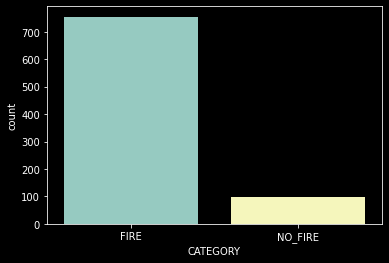

In [65]:
sns.countplot(Main_Train_Data["CATEGORY"])
plt.show()

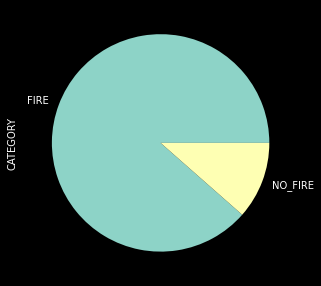

In [66]:
Main_Train_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

#### IMAGES

Text(0.5, 1.0, 'FIRE')

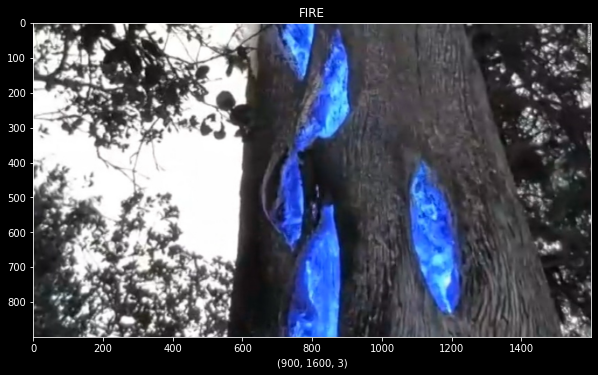

In [67]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][0])

Text(0.5, 1.0, 'FIRE')

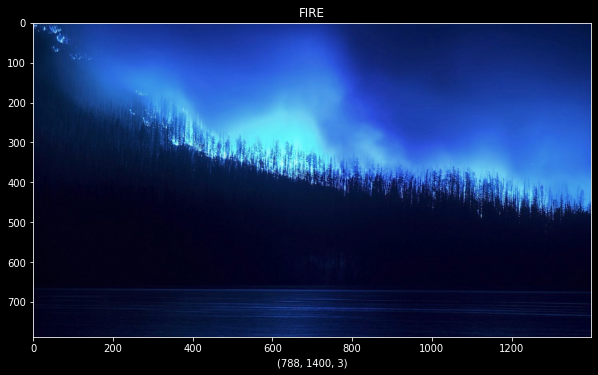

In [68]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][1])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][1])

Text(0.5, 1.0, 'FIRE')

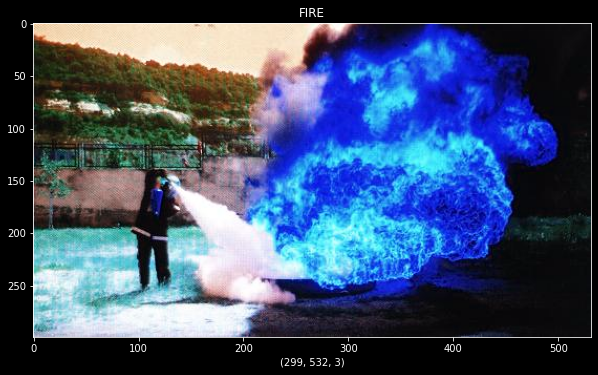

In [69]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][20])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][20])

Text(0.5, 1.0, 'FIRE')

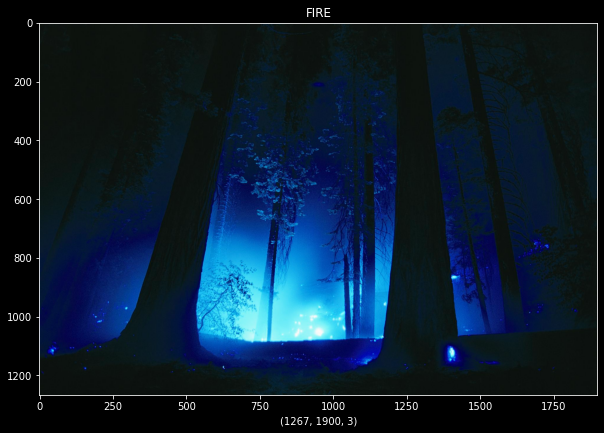

In [70]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][48])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][48])

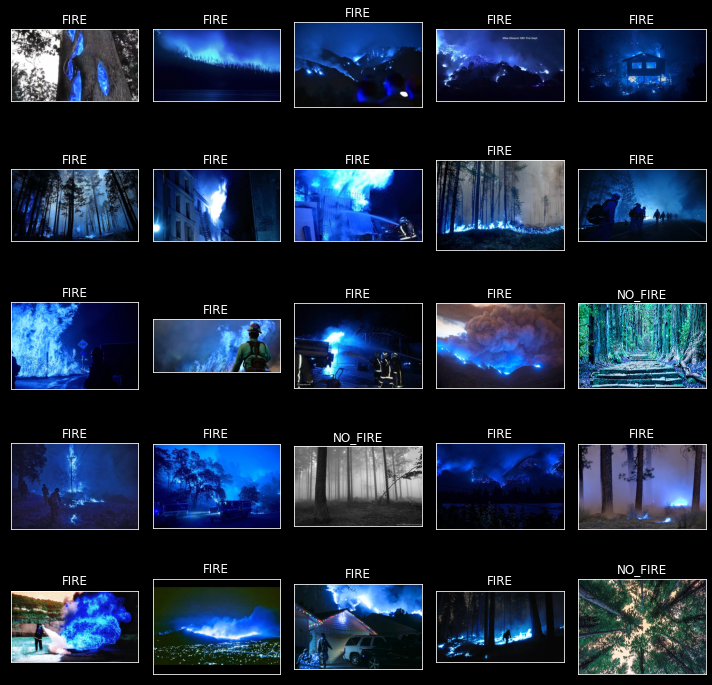

In [71]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Main_Train_Data["PNG"][i]))
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

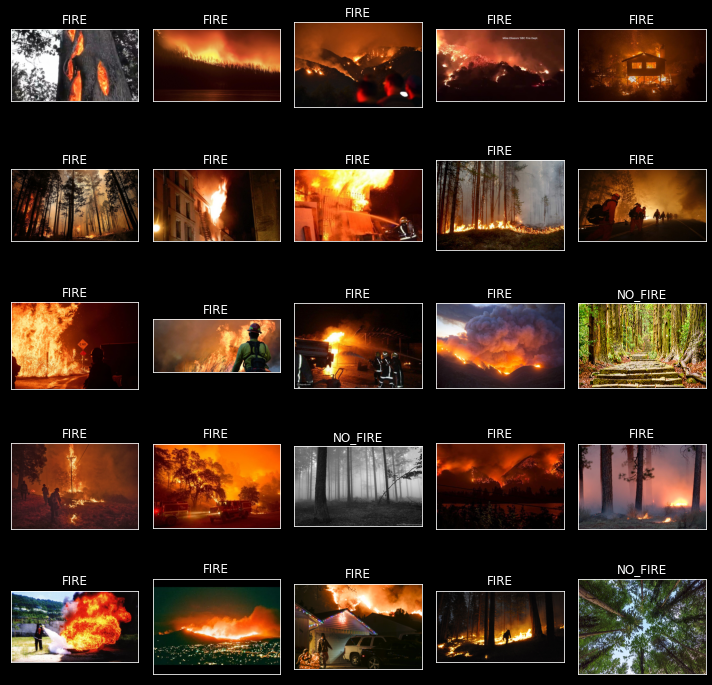

In [72]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    x = cv2.imread(Main_Train_Data["PNG"][i])
    x = cv2.cvtColor(x,cv2.COLOR_RGB2BGR)
    ax.imshow(x)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# DETERMINATION TRAIN AND TEST DATA

#### IMAGE GENERATOR

In [73]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    zoom_range=0.2,
                                    brightness_range=[0.2,0.9],
                                    rotation_range=30,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

In [74]:
Test_Generator = ImageDataGenerator(rescale=1./255)

#### SPLITTING TRAIN AND TEST

In [75]:
Train_Data,Test_Data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42,shuffle=True)

In [76]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (767, 2)
TEST SHAPE:  (86, 2)


In [77]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                                   PNG CATEGORY
628  D:\Python Project\Fire Detection using Image P...     FIRE
451  D:\Python Project\Fire Detection using Image P...     FIRE
547  D:\Python Project\Fire Detection using Image P...     FIRE
576  D:\Python Project\Fire Detection using Image P...     FIRE
49   D:\Python Project\Fire Detection using Image P...     FIRE
..                                                 ...      ...
700  D:\Python Project\Fire Detection using Image P...     FIRE
71   D:\Python Project\Fire Detection using Image P...     FIRE
106  D:\Python Project\Fire Detection using Image P...     FIRE
270  D:\Python Project\Fire Detection using Image P...     FIRE
435  D:\Python Project\Fire Detection using Image P...     FIRE

[766 rows x 2 columns]
--------------------------------------------------------------------------------
                                                   PNG CATEGORY
66   D:\Python Project\Fire Detection using Image P...  NO_FIRE

In [78]:
print(Test_Data["CATEGORY"].value_counts())

FIRE       77
NO_FIRE     9
Name: CATEGORY, dtype: int64


In [79]:
encode = LabelEncoder()

In [80]:
For_Prediction_Class = encode.fit_transform(Test_Data["CATEGORY"])

#### How Generator Applied Image Look Like

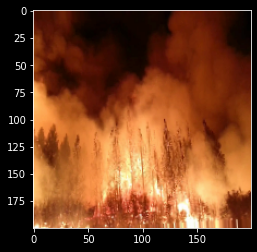

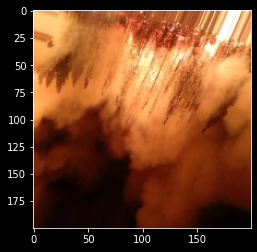

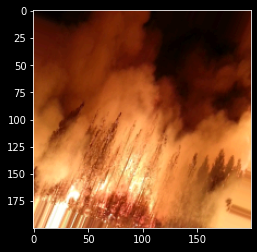

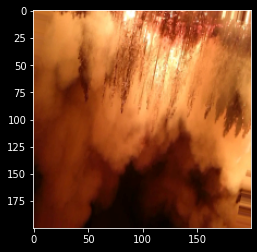

In [81]:
import keras 
example_Image = Train_Data["PNG"][99]
Load_Image = keras.utils.load_img(example_Image,target_size=(200,200))
Array_Image = keras.utils.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### APPLYING GENERATOR AND TRANSFORMATION TO TENSOR

In [82]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="training")

Found 691 validated image filenames belonging to 2 classes.


In [83]:
Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="validation")

Found 76 validated image filenames belonging to 2 classes.


In [84]:
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="PNG",
                                                 y_col="CATEGORY",
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=32)

Found 86 validated image filenames belonging to 2 classes.


#### CHECKING

In [85]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [86]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [87]:
for data_batch,label_batch in Test_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [88]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)

TRAIN: 
{'FIRE': 0, 'NO_FIRE': 1}
[0, 0, 0, 0, 0]
(256, 256, 3)
------------------------------------------------------------
VALIDATION: 
{'FIRE': 0, 'NO_FIRE': 1}
[0, 0, 0, 0, 0]
(256, 256, 3)
------------------------------------------------------------
TEST: 
{'FIRE': 0, 'NO_FIRE': 1}
[1, 0, 0, 0, 0]
(256, 256, 3)


# FEATURE EXTRACTION BY USING INCEPTION V3 MODEL

In [89]:
fire_path = r'D:\Python Project\Fire Detection using Image Processing\Source code\Dataset\fire_dataset\fire_images'
non_fire_path = r'D:\Python Project\Fire Detection using Image Processing\Source code\Dataset\fire_dataset\non_fire_images'

In [90]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import os 
base_model = InceptionV3(weights='imagenet')


# Fire Image
for i in os.listdir(fire_path):
    img = image.load_img(fire_path+'/'+ i, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = base_model.predict(x)


1/1 [==============================] - 0s 368ms/step


In [91]:
# Non- Fire Image
for i in os.listdir(non_fire_path):
    img = image.load_img(non_fire_path+'/'+ i, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = base_model.predict(x)
    

1/1 [==============================] - 0s 408ms/step


#### CHECKING

In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
!pip install tqdm
from tqdm import tqdm 
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
image_size = 256

In [94]:
for image in tqdm(os.listdir(fire_path)): 
    path = os.path.join(fire_path, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(non_fire_path)): 
    path = os.path.join(non_fire_path, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

100%|██████████| 98/98 [00:05<00:00, 19.20it/s]


In [95]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(fire_path)): 
        path = os.path.join(fire_path, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(non_fire_path)): 
        path = os.path.join(non_fire_path, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

In [96]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(fire_path)): 
        path = os.path.join(fire_path, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(non_fire_path)): 
        path = os.path.join(non_fire_path, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [97]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 98/98 [00:05<00:00, 17.41it/s]


In [98]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [99]:
z1 = np.zeros(755)
o1 = np.ones(755)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(98)
o = np.ones(98)
Y_test = np.concatenate((o, z), axis=0)

In [100]:
Y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [101]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [102]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (1706, 256, 256)
Y shape:  (1706, 1)


In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [104]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (1450, 65536)
X test flatten (256, 65536)


In [105]:
linear_model = LogisticRegression()
linear_model.fit(x_train_flatten,y_train)

LogisticRegression()

In [109]:
predict=linear_model.predict(x_test_flatten)
predict


array([1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0.

In [125]:
# import os
# from PIL import Image

# PATH = Image.open("D:\\Python Project\Fire Detection using Image Processing\\Source code\\Dataset\\fire_dataset\\predict\\fire.3.png")
# #Copy_to_path="D:\\Python Project\Fire Detection using Image Processing\\Source code\Dataset\\fire_dataset\\"

# # for filename in os.listdir(PATH):
# #     img = Image.open(os.path.join(PATH, filename)) # images are color images
# #     img = img.resize((224,224), Image.ANTIALIAS)
# #     img.save(Copy_to_path+filename+'.png') 
# PATH.show()


In [107]:
print(confusion_matrix(y_test,predict))

[[124   2]
 [  8 122]]


In [108]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       126
         1.0       0.98      0.94      0.96       130

    accuracy                           0.96       256
   macro avg       0.96      0.96      0.96       256
weighted avg       0.96      0.96      0.96       256

